<a href="https://colab.research.google.com/github/AbhinavCurseOK/ML_Lab_SA/blob/main/ML_Lab_TestPart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import kagglehub
path = kagglehub.dataset_download("milobele/sentiment140-dataset-1600000-tweets")
print("Path to dataset files:", path)

100%|██████████| 81.0M/81.0M [00:00<00:00, 110MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1


In [ ]:
import pandas as pd
df_train = pd.read_csv(path + '/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df_test = pd.read_csv(path + '/testdata.manual.2009.06.14.csv', encoding='latin-1', header=None)

In [ ]:
df_train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
column_names = ['polarity', 'id', 'date', 'query', 'user', 'content']
df_train.columns = column_names
df_test.columns = column_names

In [ ]:
df_train.isnull().sum()

,0
polarity,0
id,0
date,0
query,0
user,0
content,0


In [ ]:
import numpy as np
string_columns = df_train.select_dtypes(include=['object']).columns
for column in string_columns:
    df_train[column] = df_train[column].map(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [ ]:
import numpy as np
string_columns = df_test.select_dtypes(include=['object']).columns
for column in string_columns:
    df_test[column] = df_test[column].map(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [ ]:
df_test.isnull().sum()

,0
polarity,0
id,0
date,0
query,0
user,0
content,0


In [ ]:
df_train["polarity"].unique()

array([0, 4])

In [ ]:
df_test["polarity"].unique()

array([4, 0, 2])

In [ ]:
df_train["polarity"].value_counts()

,count
polarity,
0,800000
4,800000


In [ ]:
df_test["polarity"].value_counts()

,count
polarity,
4,182
0,177
2,139


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   query     498 non-null    object
 4   user      498 non-null    object
 5   content   498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


In [ ]:
df_train.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)
df_test.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df['polarity'] = df['polarity'].replace({0: -1, 2:0, 4: 1})

In [ ]:
df["polarity"].unique()

array([-1,  1,  0])

In [ ]:
dfreddit = pd.read_csv('Reddit_Data.csv')
dfTwitter = pd.read_csv('Twitter_Data.csv')

In [ ]:
dfreddit['category'].value_counts()

,count
category,
1,15830
0,13142
-1,8277


In [ ]:
dfreddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
dfreddit.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
dfreddit = dfreddit.dropna(subset=['clean_comment']).reset_index(drop=True)

In [ ]:
dfreddit = dfreddit.rename(columns={'clean_comment': 'content', 'category': 'polarity'})

In [ ]:
dfTwitter['category'].value_counts()

,count
category,
1.0,72250
0.0,55213
-1.0,35510


In [ ]:
dfTwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
dfTwitter.isnull().sum()

,0
clean_text,4
category,7


In [ ]:
dfTwitter = dfTwitter.dropna(subset=['clean_text', 'category']).reset_index(drop=True)

In [ ]:
dfTwitter['category'] = dfTwitter['category'].astype(int)

In [ ]:
dfTwitter = dfTwitter.rename(columns={'clean_text': 'content', 'category': 'polarity'})

In [ ]:
dfTwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162969 entries, 0 to 162968
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   162969 non-null  object
 1   polarity  162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
combined_df = pd.concat([df, dfTwitter, dfreddit], ignore_index=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800616 entries, 0 to 1800615
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   content   object
dtypes: int64(1), object(1)
memory usage: 27.5+ MB


In [ ]:
combined_df['polarity'].value_counts()

,count
polarity,
1,888261
-1,843963
0,68392


In [ ]:
def clean_text(text):
    reg1 = r'@[^ ]+'
    reg2 = r'https?://[A-Za-z0-9./]+'
    reg3 = r'\'s'
    reg4 = r'\#\w+'
    reg5 = r'&amp '
    reg6 = r'[^A-Za-z\s]'
    combined_reg = r'|'.join((reg1, reg2, reg3, reg4, reg5, reg6))
    text = re.sub(combined_reg, "", text).lower()
    return text.strip()

def preprocess_text(text):
    default_stop_words = set(stopwords.words('english'))
    negation_words = {"no", "nor", "not", "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"}
    custom_stop_words = default_stop_words - negation_words
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in custom_stop_words]
    return tokens
def analyze_sentiment(tokens):
    text = " ".join(tokens)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
combined_df['cleaned_content'] = combined_df['content'].apply(clean_text)
combined_df = combined_df[combined_df['cleaned_content'] != ''].reset_index(drop=True)
combined_df['tokens'] = combined_df['cleaned_content'].apply(preprocess_text)
combined_df['sentiment_score'] = combined_df['tokens'].apply(analyze_sentiment)
combined_df[['content', 'cleaned_content', 'tokens', 'sentiment_score','polarity']].head()

,content,cleaned_content,tokens,sentiment_score,polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that a bummer you shoulda got david carr...,"[awww, bummer, shoulda, got, david, carr, thir...",0.200,-1
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might...",0.000,-1
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,"[dived, many, time, ball, managed, save, rest,...",0.500,-1
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",0.200,-1
4,"@nationwideclass no, it's not behaving at all....",no it not behaving at all im mad why am i here...,"[no, not, behaving, im, mad, cant, see]",-0.625,-1


In [ ]:
combined_df.shape

(1796414, 5)

In [ ]:
combined_df.columns

Index(['polarity', 'content', 'cleaned_content', 'tokens', 'sentiment_score'], dtype='object')

In [ ]:
df1 = combined_df.drop(['content', 'tokens', 'sentiment_score'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796414 entries, 0 to 1796413
Data columns (total 2 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   polarity         int64 
 1   cleaned_content  object
dtypes: int64(1), object(1)
memory usage: 27.4+ MB


In [ ]:
import pandas as pd
import numpy as np
df1['polarity'] = pd.to_numeric(df1['polarity'], errors='coerce')

In [ ]:
df1.isnull().sum()

,0
polarity,0
cleaned_content,0


In [ ]:
string_columns = df1.select_dtypes(include=['object']).columns
for column in string_columns:
    df1[column] = df1[column].map(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [ ]:
df1['polarity'].value_counts()

,count
polarity,
1,886033
-1,842245
0,68136


In [ ]:
df1.to_csv('TWT.csv', index=False)

In [ ]:
import pandas as pd
df_1 = pd.read_csv('TWT.csv')

<ipython-input-39-828de763202f>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('TWT.csv')


In [ ]:
df_1.isnull().sum()

,0
polarity,0
cleaned_content,1


In [ ]:
df_1.dropna(subset=['cleaned_content'], inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1['polarity'] = df_1['polarity'].astype(int)

In [ ]:
df_1['polarity'].value_counts()

,count
polarity,
1,886033
-1,842245
0,68136


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

negative_words = ''
neutral_words = ''
positive_words = ''
stopwords = set(STOPWORDS)
for content, polarity in zip(df_1['cleaned_content'], df_1['polarity']):
    tokens = [word for word in content.split() if word.lower() not in stopwords]
    for word in tokens:
        if polarity == -1:
            negative_words += word + ' '
        elif polarity == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [ ]:
negative_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(negative_words)
neutral_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(neutral_words)
positive_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(positive_words)

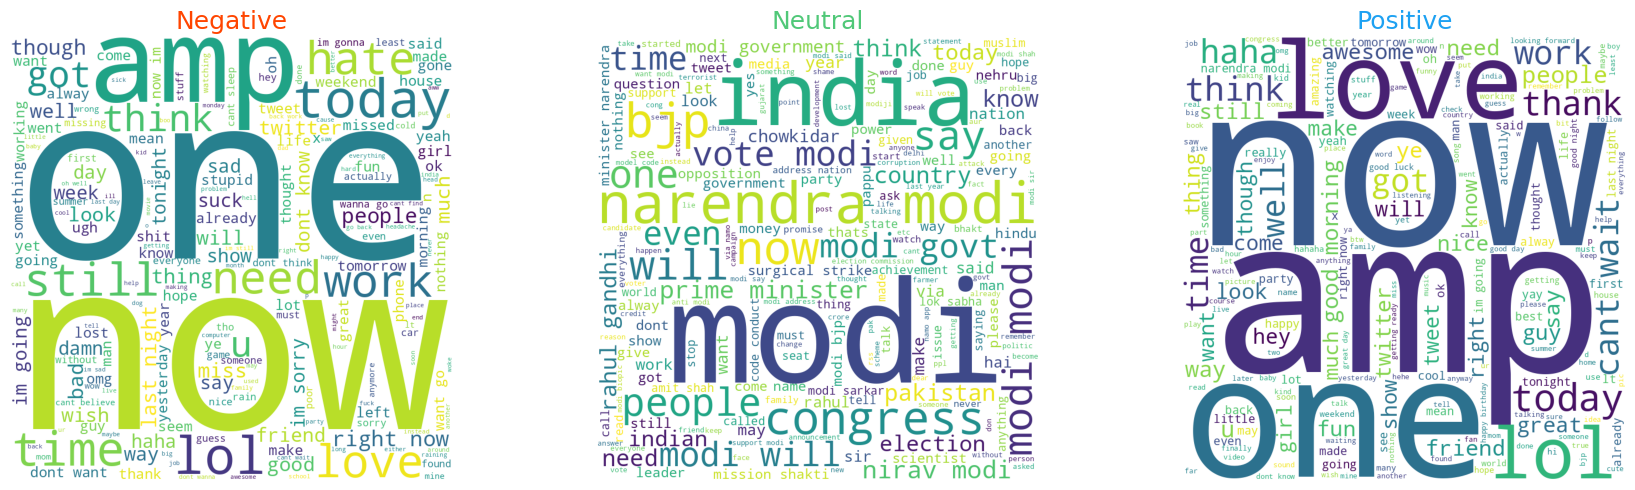

In [ ]:
# Plot the WordClouds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)
ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='#ff4500')
ax1.axis("off")

ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='#50C878')
ax2.axis("off")

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')
ax3.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#text_data = df_1["cleaned_content"]
#polarity = df_1["polarity"]
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(text_data).toarray()
#smote = SMOTE(sampling_strategy=0.2, random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, polarity)

In [ ]:
class Data:
    def __init__(self, df):
        self.df = df
    def fixData(self):
        dataframe = self.df
        lowest_len = dataframe['polarity'].value_counts().min()
        new_df = pd.concat([
            dataframe[dataframe['polarity'] == -1].head(lowest_len),
            dataframe[dataframe['polarity'] == 0].head(lowest_len),
            dataframe[dataframe['polarity'] == 1].head(lowest_len)
        ])
        new_df = new_df.sample(frac=1).reset_index(drop=True)
        return new_df

In [ ]:
obj = Data(df_1)
updated_df = obj.fixData()
print(f'Before: \n{df_1.polarity.value_counts()}\n')
print(f'After: \n{updated_df.polarity.value_counts()}')

Before: 
polarity
 1    886033
-1    842245
 0     68136
Name: count, dtype: int64

After: 
polarity
 0    68136
 1    68136
-1    68136
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
df_2 = updated_df[['cleaned_content', 'polarity']].copy()
df_2['original_index'] = updated_df.index
df_2.reset_index(drop=True, inplace=True)

train_X, test_X, train_y, test_y = train_test_split(
    df_2['cleaned_content'],
    df_2['polarity'],
    test_size=0.2,
    random_state=1,
    stratify=df_2['polarity'])

In [ ]:
import pandas as pd
df_2.to_pickle('df_2.pkl')

In [ ]:
df_2 = pd.read_pickle('df_2.pkl')

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(
    df_2['cleaned_content'],
    df_2['polarity'],
    test_size=0.2,
    random_state=1,
    stratify=df_2['polarity'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

negative_words_1 = ''
neutral_words_1 = ''
positive_words_1 = ''
stopwords = set(STOPWORDS)
for content, polarity in zip(df_2['cleaned_content'], df_2['polarity']):
    tokens = [word for word in content.split() if word.lower() not in stopwords]
    for word in tokens:
        if polarity == -1:
            negative_words_1 += word + ' '
        elif polarity == 0:
            neutral_words_1 += word + ' '
        else:
            positive_words_1 += word + ' '

In [ ]:
negative_cloud_1 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(negative_words_1)
neutral_cloud_1 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(neutral_words_1)
positive_cloud_1 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(positive_words_1)

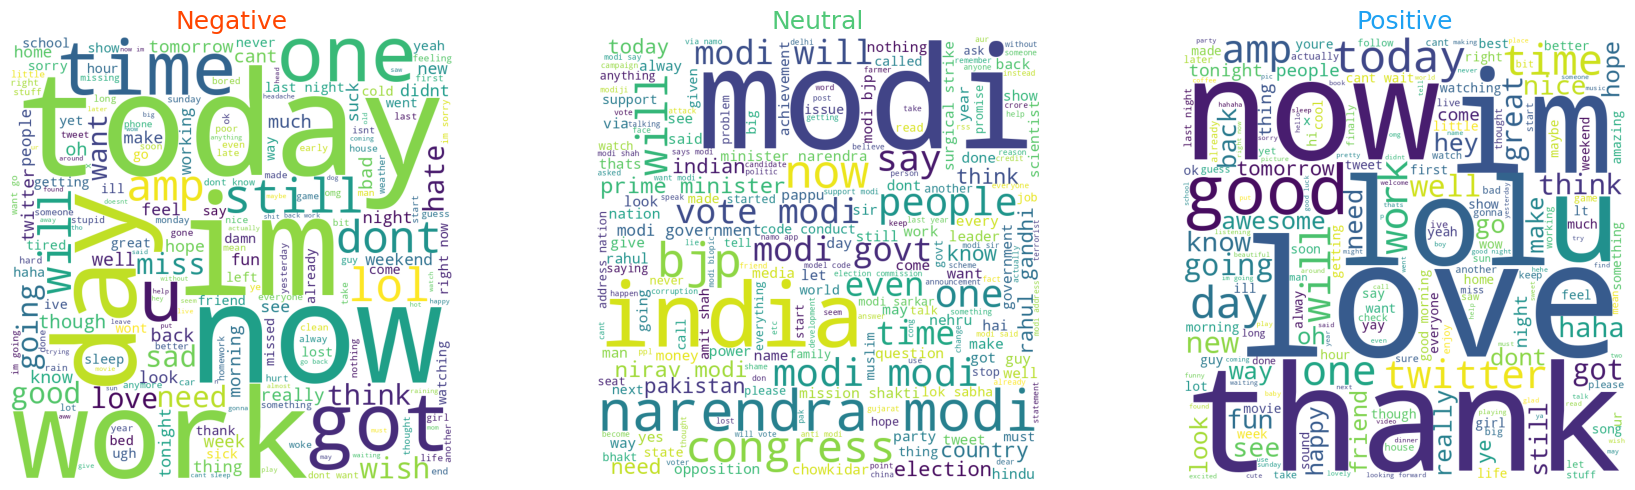

In [ ]:
# Plot the WordClouds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)
ax1.imshow(negative_cloud_1)
ax1.set_title('Negative', fontsize=18, color='#ff4500')
ax1.axis("off")

ax2.imshow(neutral_cloud_1)
ax2.set_title('Neutral', fontsize=18, color='#50C878')
ax2.axis("off")

ax3.imshow(positive_cloud_1)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')
ax3.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [ ]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [ ]:
vectorizer = joblib.load('tfidf_vectorizer.joblib')

In [ ]:
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#min_max_scaler = MinMaxScaler()
#standard_scaler = StandardScaler()

#MinMaxScaler#session crashed
#train_X_vectors_minmax = min_max_scaler.fit_transform(train_X_vectors.toarray())
#test_X_vectors_minmax = min_max_scaler.transform(test_X_vectors.toarray())

#StandardScaler
#train_X_vectors_standard = standard_scaler.fit_transform(train_X_vectors.toarray())
#test_X_vectors_standard = standard_scaler.transform(test_X_vectors.toarray())

In [ ]:
train_X_vectors

<163526x98657 sparse matrix of type '<class 'numpy.float64'>'
	with 1871399 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X_vectors, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = logreg.predict(train_X_vectors)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_y, y_pred_train)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.8872656335995499


In [ ]:
y_pred_test = logreg.predict(test_X_vectors)
accuracy = accuracy_score(test_y, y_pred_test)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8382662296365149


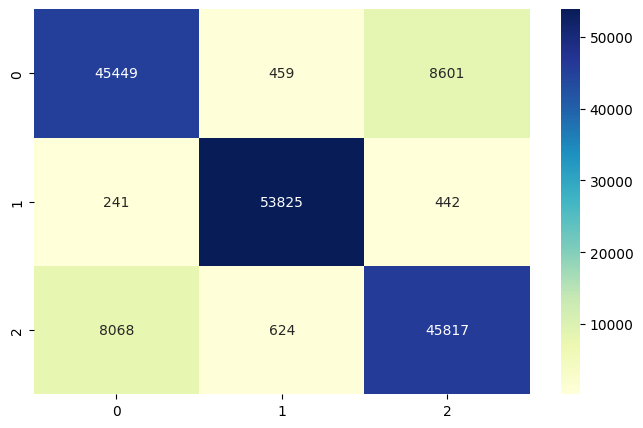

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y, y_pred_train)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_y, y_pred_test, average='micro')
recall = recall_score(test_y, y_pred_test, average='micro')
f1 = f1_score(test_y, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8382662296365149
Recall: 0.8382662296365149
F1 Score: 0.8382662296365149


In [ ]:
import numpy as np
from sklearn.metrics import recall_score, confusion_matrix
tpr = recall_score(test_y, y_pred_test, average='micro')
cm = confusion_matrix(test_y, y_pred_test)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
TNR = np.mean(TN / (TN + FP))

print(f"True Positive Rate (TPR/Sensitivity/Recall): {tpr}")
print(f"True Negative Rate (TNR/Specificity): {TNR}")

True Positive Rate (TPR/Sensitivity/Recall): 0.8382662296365149
True Negative Rate (TNR/Specificity): 0.919133841765459


In [ ]:
import pickle
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.arange(0.8, 2, 0.4),
    'solver': ['liblinear', 'saga'],
    'max_iter': [500,1000]
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_X_vectors, train_y)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_logreg = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
y_pred_train_logreg_best = best_logreg.predict(train_X_vectors)

In [ ]:
y_pred_test_logreg_best = best_logreg.predict(test_X_vectors)

In [ ]:
best_logreg.classes_

array([-1,  0,  1])

In [ ]:
accuracy = accuracy_score(train_y, y_pred_train_logreg_best)
print(f"Training Accuracy: {accuracy}")
precision = precision_score(train_y, y_pred_train_logreg_best, average='micro')
print(f"Training Precision: {precision}")
recall = recall_score(train_y, y_pred_train_logreg_best, average='micro')
print(f"Training Recall: {recall}")
f1 = f1_score(train_y, y_pred_train_logreg_best, average='micro')
print(f"Training F1-score: {f1}")

Training Accuracy: 0.8877181610263811
Training Precision: 0.8877181610263811
Training Recall: 0.8877181610263811
Training F1-score: 0.8877181610263811


In [ ]:
accuracy = accuracy_score(test_y, y_pred_test_logreg_best)
print(f"Test Accuracy: {accuracy}")
precision = precision_score(test_y, y_pred_test_logreg_best, average='micro')
print(f"Test Precision: {precision}")
recall = recall_score(test_y, y_pred_test_logreg_best, average='micro')
print(f"Test Recall: {recall}")
f1 = f1_score(test_y, y_pred_test_logreg_best, average='micro')
print(f"Test F1-score: {f1}")

Test Accuracy: 0.8388777457071572
Test Precision: 0.8388777457071572
Test Recall: 0.8388777457071572
Test F1-score: 0.8388777457071572


In [ ]:
import joblib
joblib.dump(best_logreg, 'best_logreg_model.joblib')

['best_logreg_model.joblib']

In [ ]:
import joblib
loaded_model = joblib.load('best_logreg_model.joblib')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(train_X_vectors, train_y)
y_pred_train_rf = rf_classifier.predict(train_X_vectors)
y_pred_test_rf = rf_classifier.predict(test_X_vectors)

In [ ]:
train_accuracy_rf = accuracy_score(train_y, y_pred_train_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")

test_accuracy_rf = accuracy_score(test_y, y_pred_test_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

Random Forest Training Accuracy: 0.9977067866883553
Random Forest Test Accuracy: 0.8178415928770608


In [ ]:
import joblib
joblib.dump(rf_classifier, 'rf_classifier_model.joblib')

['rf_classifier_model.joblib']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 4]}

rf_classifier = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,cv=2,scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(train_X_vectors, train_y)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
y_pred_train_best_rf = best_rf_classifier.predict(train_X_vectors)
y_pred_test_best_rf = best_rf_classifier.predict(test_X_vectors)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(train_y, y_pred_train_best_rf)
precision = precision_score(train_y, y_pred_train_best_rf, average='micro')
recall = recall_score(train_y, y_pred_train_best_rf, average='micro')
f1 = f1_score(train_y, y_pred_train_best_rf, average='micro')

print(f"Training Accuracy: {accuracy}")
print(f"Training Precision: {precision}")
print(f"Training Recall: {recall}")
print(f"Training F1-score: {f1}")

Training Accuracy: 0.7886941526118171
Training Precision: 0.7886941526118171
Training Recall: 0.7886941526118171
Training F1-score: 0.7886941526118171


In [ ]:
accuracy = accuracy_score(test_y, y_pred_test_best_rf)
precision = precision_score(test_y, y_pred_test_best_rf, average='micro')
recall = recall_score(test_y, y_pred_test_best_rf, average='micro')
f1 = f1_score(test_y, y_pred_test_best_rf, average='micro')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")

Test Accuracy: 0.7754023775744826
Test Precision: 0.7754023775744826
Test Recall: 0.7754023775744826
Test F1-score: 0.7754023775744826


In [ ]:
import joblib
joblib.dump(best_rf_classifier, 'best_rf_classifier_model.joblib')

['best_rf_classifier_model.joblib']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None,30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_classifier = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,cv=3,scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(train_X_vectors, train_y)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_classifier_1 = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_pred_train = best_rf_classifier_1.predict(train_X_vectors)
y_pred_test = best_rf_classifier_1.predict(test_X_vectors)

In [ ]:
accuracy = accuracy_score(train_y, y_pred_train)
precision = precision_score(train_y, y_pred_train, average='micro')
recall = recall_score(train_y, y_pred_train, average='micro')
f1 = f1_score(train_y, y_pred_train, average='micro')

print(f"Training Accuracy: {accuracy}")
print(f"Training Precision: {precision}")
print(f"Training Recall: {recall}")
print(f"Training F1-score: {f1}")

In [ ]:
accuracy = accuracy_score(test_y, y_pred_test)
precision = precision_score(test_y, y_pred_test, average='micro')
recall = recall_score(test_y, y_pred_test, average='micro')
f1 = f1_score(test_y, y_pred_test, average='micro')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")

In [ ]:
import joblib
joblib.dump(best_rf_classifier_1, 'best_rf_classifier_model_1.joblib')